In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
salary_train_df = pd.read_csv('SalaryData_Train(1).csv')
salary_train_df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
salary_test_df = pd.read_csv('SalaryData_Test(1).csv')
salary_test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [4]:
salary_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
salary_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
salary_train_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary_test_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
salary_train_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
salary_train_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
salary_test_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
salary_test_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salary_train_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [13]:
salary_test_df['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

<AxesSubplot:xlabel='workclass', ylabel='count'>

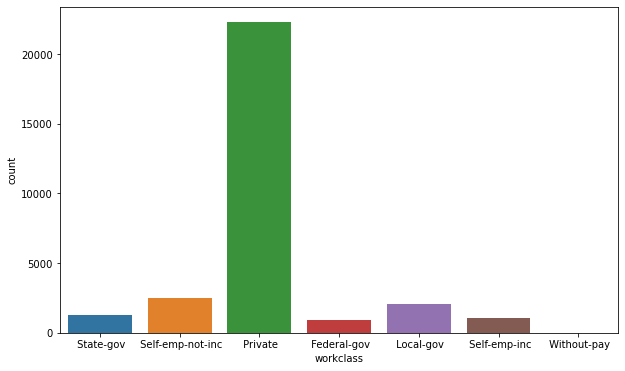

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=salary_train_df,x=salary_train_df['workclass'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

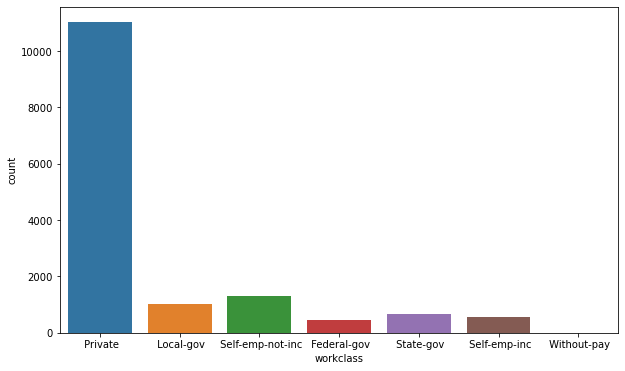

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=salary_test_df,x=salary_test_df['workclass'])

In [16]:
#Maximum employees are private employee

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

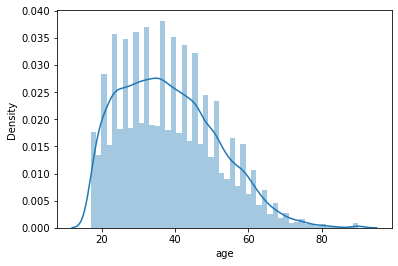

In [17]:
sns.distplot(salary_train_df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

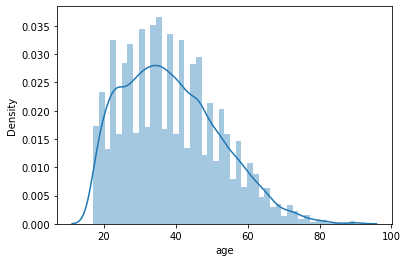

In [18]:
sns.distplot(salary_test_df['age'])

In [19]:
salary_train_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [20]:
salary_test_df['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='count'>

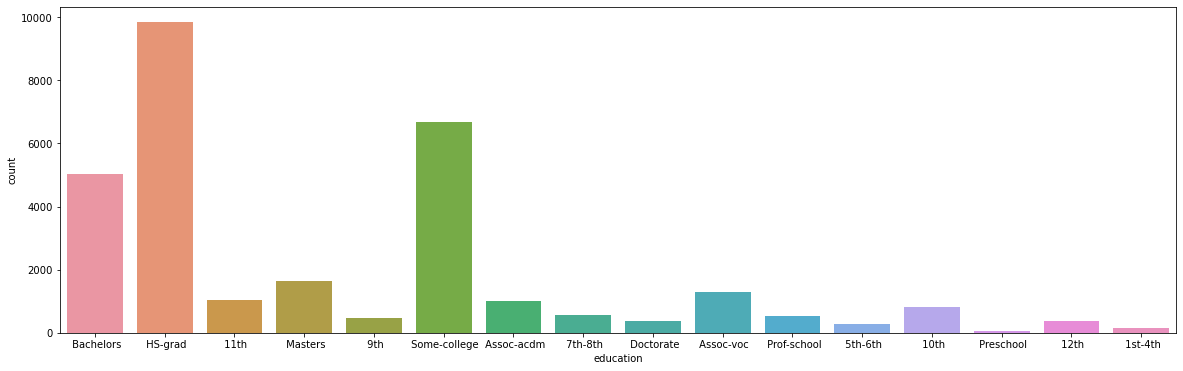

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(data=salary_train_df,x=salary_train_df['education'])

<AxesSubplot:xlabel='education', ylabel='count'>

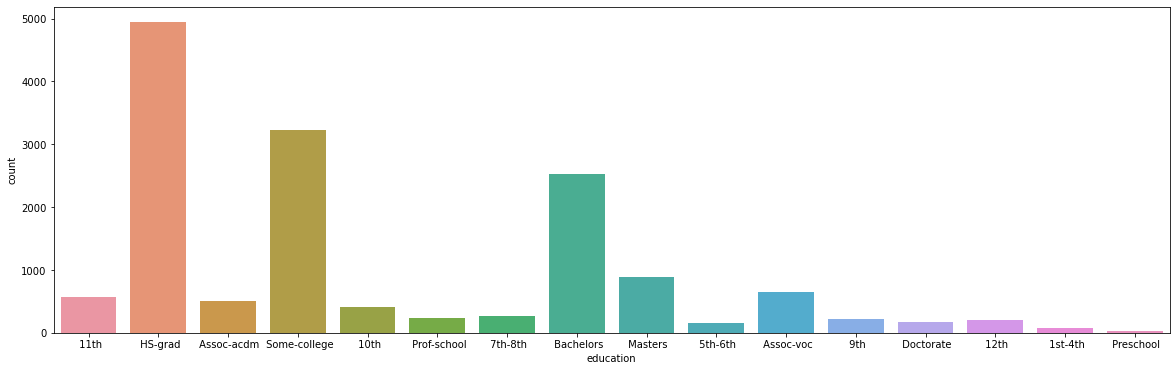

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(data=salary_test_df,x=salary_test_df['education'])

In [23]:
salary_train_df['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [24]:
salary_test_df['educationno'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

<AxesSubplot:xlabel='educationno', ylabel='count'>

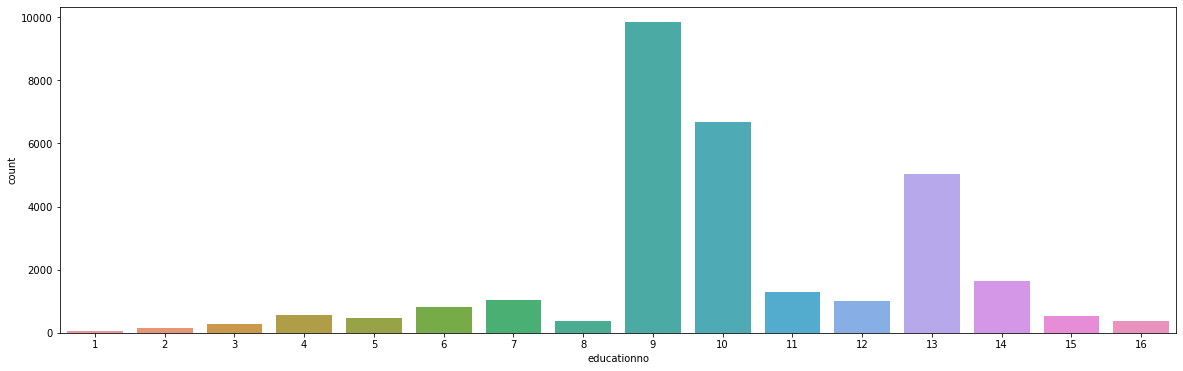

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(data=salary_train_df,x=salary_train_df['educationno'])

<AxesSubplot:xlabel='educationno', ylabel='count'>

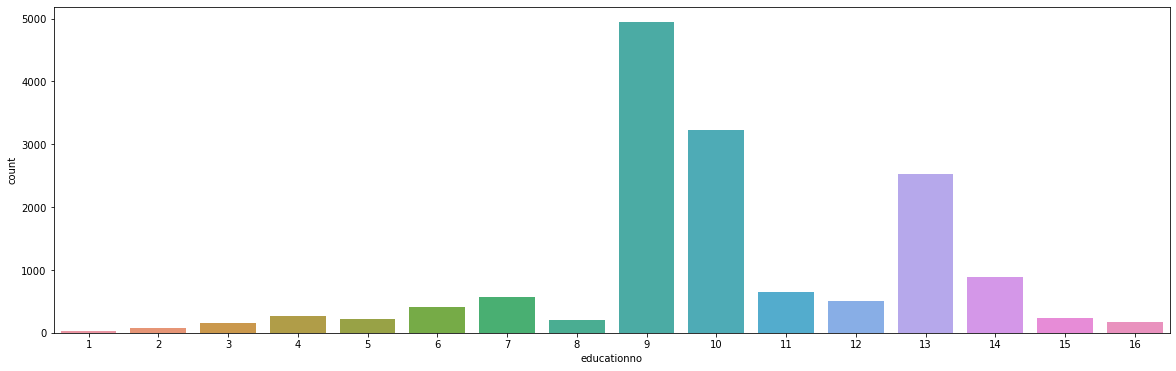

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(data=salary_test_df,x=salary_test_df['educationno'])

In [27]:
salary_train_df['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [28]:
salary_test_df['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

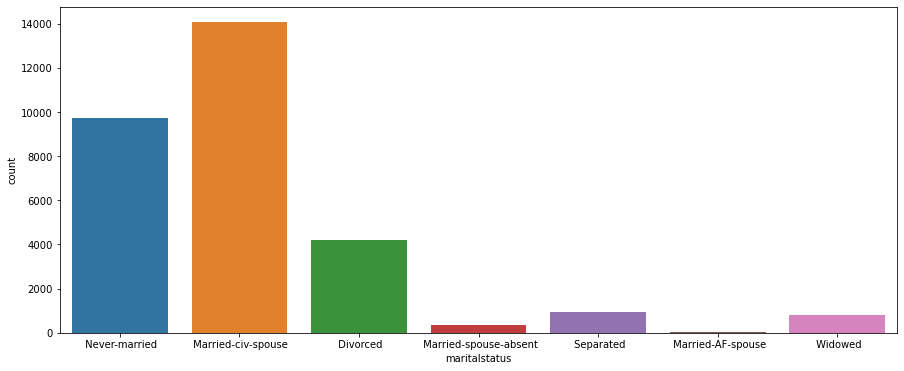

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_train_df,x=salary_train_df['maritalstatus'])

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

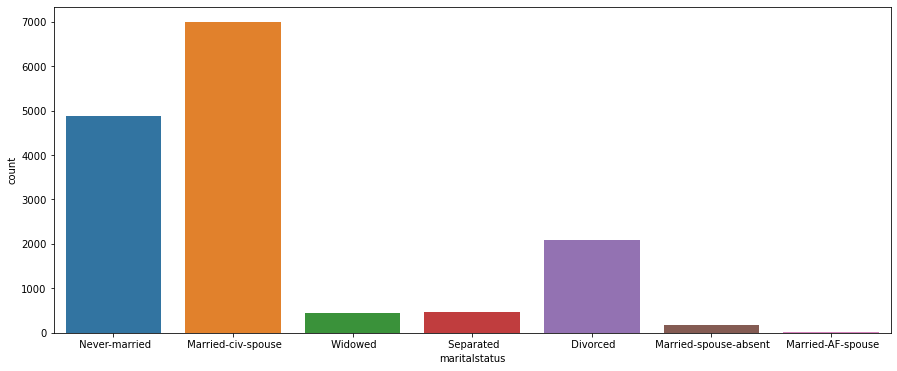

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_test_df,x=salary_test_df['maritalstatus'])

In [31]:
salary_train_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<AxesSubplot:xlabel='occupation', ylabel='count'>

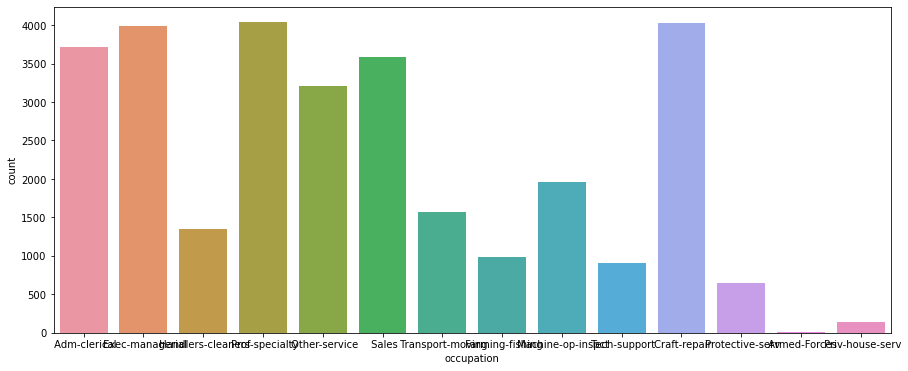

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_train_df,x=salary_train_df['occupation'])

In [33]:
salary_train_df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

<AxesSubplot:xlabel='relationship', ylabel='count'>

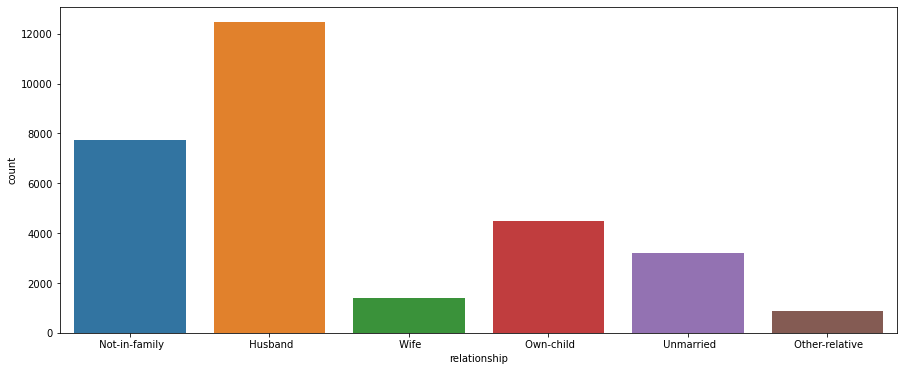

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_train_df,x=salary_train_df['relationship'])

In [35]:
salary_train_df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

<AxesSubplot:xlabel='race', ylabel='count'>

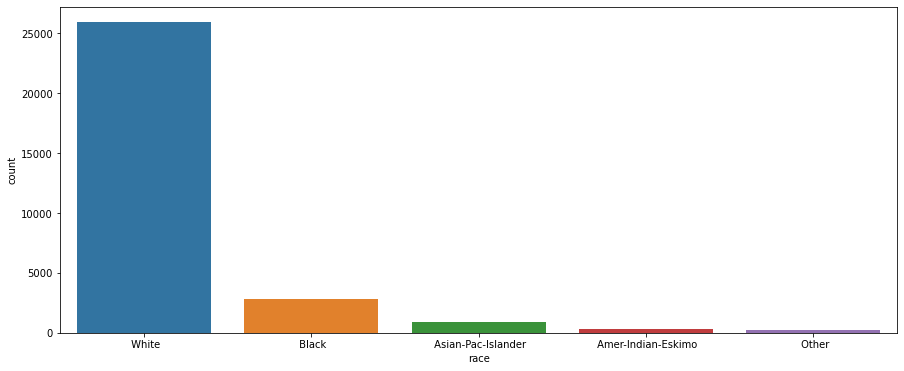

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_train_df,x=salary_train_df['race'])

In [37]:
salary_train_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

<AxesSubplot:xlabel='sex', ylabel='count'>

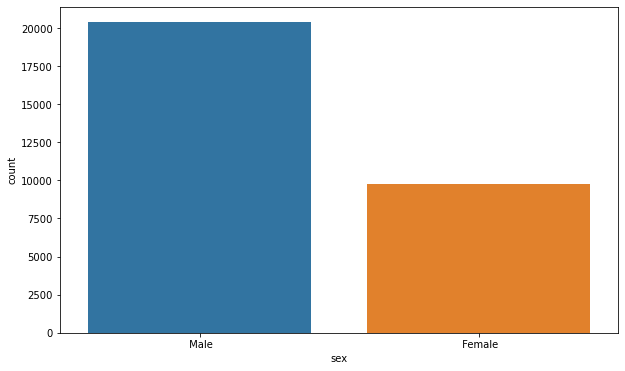

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=salary_train_df,x=salary_train_df['sex'])

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

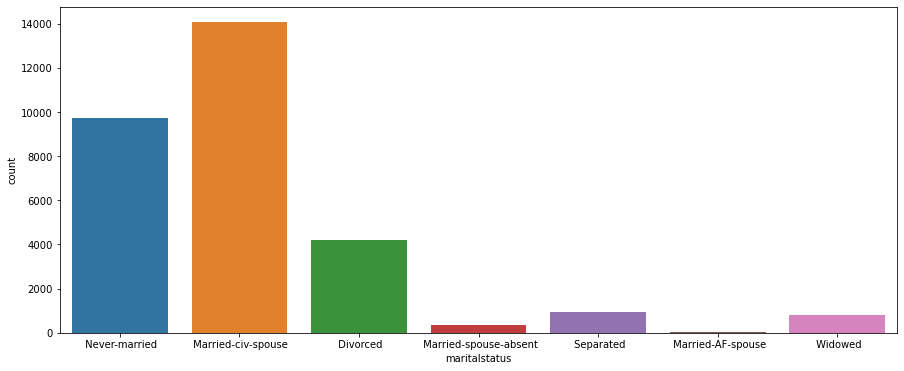

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(data=salary_train_df,x=salary_train_df['maritalstatus'])

In [40]:
salary_train_df['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

<AxesSubplot:xlabel='native', ylabel='count'>

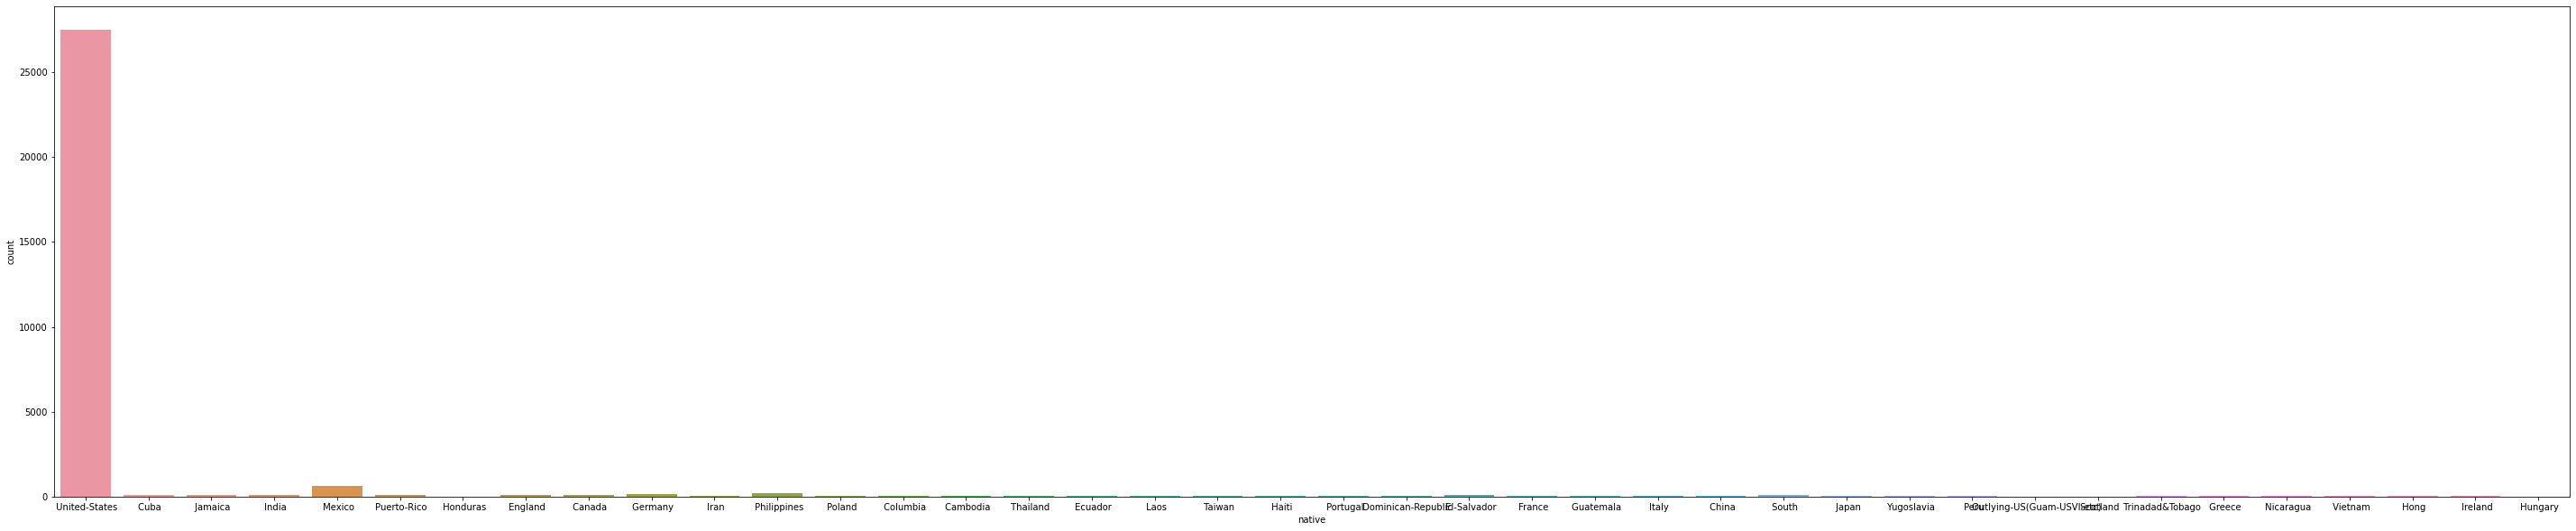

In [41]:
plt.figure(figsize=(50,10))
sns.countplot(data=salary_train_df,x=salary_train_df['native'])

In [42]:
#Maximum are from US 

In [43]:
salary_train_df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:xlabel='Salary', ylabel='count'>

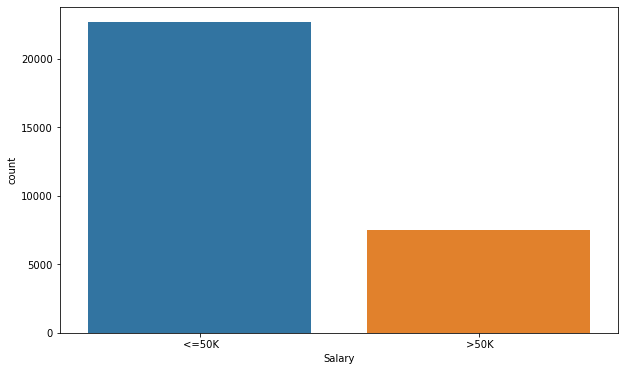

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=salary_train_df,x=salary_train_df['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

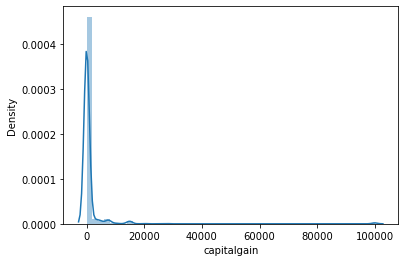

In [45]:
sns.distplot(salary_train_df['capitalgain'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

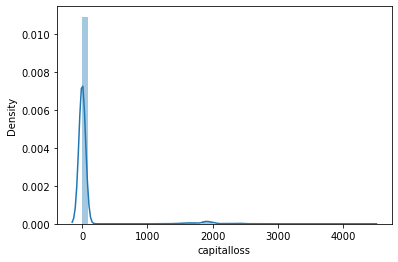

In [46]:
sns.distplot(salary_train_df['capitalloss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

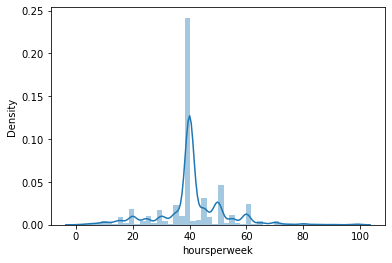

In [47]:
sns.distplot(salary_train_df['hoursperweek'])

In [48]:
#Most of employees work 40 hrs per week

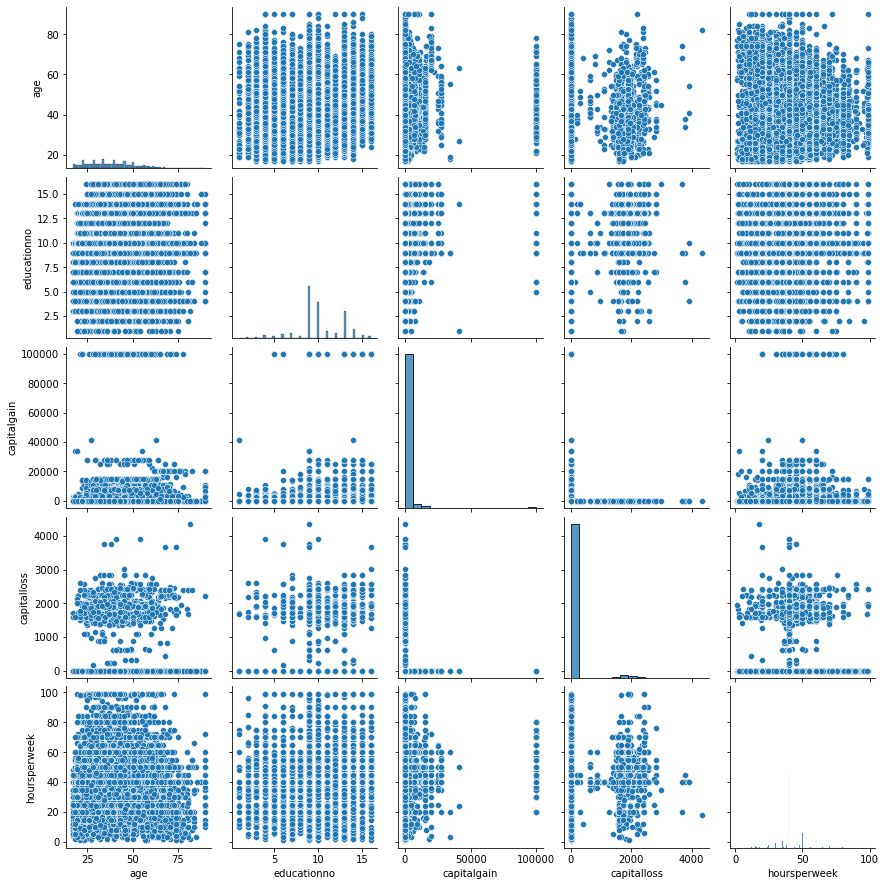

In [49]:
sns.pairplot(salary_train_df)

<AxesSubplot:>

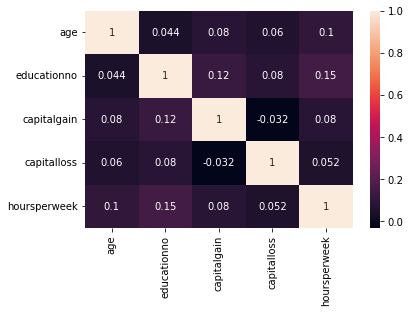

In [50]:
sns.heatmap(salary_train_df.corr(),annot=True)

# Data Prepocessing

Most of colums are categorical columns are categorical columns so we can apply LabelEncoding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [53]:
encode = LabelEncoder()
for i in string_columns:
        salary_train_df[i]= encode.fit_transform(salary_train_df[i])
        salary_test_df[i]=encode.fit_transform(salary_test_df[i])

In [54]:
salary_train_df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
5,37,2,12,14,2,3,5,4,0,0,0,40,37,<=50K
6,49,2,6,5,3,7,1,2,0,0,0,16,21,<=50K
7,52,4,11,9,2,3,0,4,1,0,0,45,37,>50K
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,>50K
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,>50K


In [55]:
salary_test_df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,>50K
6,24,2,15,10,4,7,4,4,0,0,0,40,37,<=50K
7,55,2,5,4,2,2,0,4,1,0,0,10,37,<=50K
8,65,2,11,9,2,6,0,4,1,6418,0,40,37,>50K
9,36,0,9,13,2,0,0,4,1,0,0,40,37,<=50K


# Splitting Data in to Train and Test

In [56]:
len(salary_train_df.columns)

14

In [57]:
x_train = salary_train_df.iloc[:,0:13]
y_train = salary_train_df.iloc[:,13]
x_test = salary_test_df.iloc[:,0:13]
y_test = salary_test_df.iloc[:,13]

In [58]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30161, 13), (15060, 13), (30161,), (15060,))

In [59]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [60]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [61]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [62]:
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


# SVM

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.svm import SVC

In [65]:
kernel_var =['linear','poly','rbf','sigmoid']
for i in range(len(kernel_var)):
    model_svm = SVC(kernel =kernel_var[i])
    model_svm.fit(x_train,y_train)
    pred_test = model_svm.predict(x_test)
    print('Accuracy for kernal ',kernel_var[i],' : ',np.mean(pred_test==y_test))

Accuracy for kernal  linear  :  0.8098273572377158
Accuracy for kernal  poly  :  0.8435590969455511
Accuracy for kernal  rbf  :  0.8432934926958832
Accuracy for kernal  sigmoid  :  0.5768924302788845


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8435590969455511


In [70]:
print(confusion_matrix(y_test,pred_test_poly))

[[10626   734]
 [ 1622  2078]]


In [74]:
print(classification_report(y_test, pred_test_poly))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     11360
        >50K       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060

